# Задание для итоговой работы

**Анализ данных о покупках** 

* Шаг 1. Импорт библиотек 
* Шаг 2. Загрузка данных из файлов (customers.csv, transactions.csv, product.csv)
* Шаг 3. Очистка данных
    1. Проверить соответствие типов данных, выполнить преобразование типов данных при необходимости
    1. Проверить на пропуски, заполнить пропуски при необходимости 
    1. Проверить данные на наличие дубликатов в датасетах *customers* и *product*
    1. Выполнить поиск аномалий в данных, построить диаграмму размаха по признаку возраст покупателя, выполнить удаление выбросов при необходимости
* Шаг 4. Разведочный (исследовательский) анализ данных
    1. Определить сколько товаров продавалось в разные месяцы, построить график плотности
    1. Определить список товаров ТОП-10 с максимальной выручкой за все время, построить столбчатую диаграмму
    1. Определить список популярных товаров ТОП-10 за все время, построить столбчатую диаграмму
    1. Определить долю товаров, которые были проданы один раз, построить круговую диаграмму
    1. Определить какая возрастная группа покупает больше товаров, группы формировать с шагом 10 лет, построить столбчатую диаграмму и график плотности распределения
    1. Определить покупают ли больше товаров те, кто активно следит за новостями о моде, построить стобчатую диаграмму
* Шаг 5. Анализ взаимосвязи признаков
    1. Проверить гипотезу о данных - влияет ли статус членства клуба на количество купленных товаров, найти p-value, сформулировать вывод
* Шаг 6. Кластеризация по покупателем
    1. Сформировать датасет с признаками *покупатель, количество купленных товаров, возраст, итоговая потраченная сумма, членство в клубе, частота просмотра новостей*
    1. Найти оптимальное количество кластеров по покупателям
    1. Построить модель кластеризации данных
    1. Визуализировать кластеры с помощью диаграммы рассеивания, выбрать подходящие признаки для диаграммы
* Шаг 7. Построение рекомендательной системы 
    1. Сформировать датасет с признаками *покупатель, товар, количество купленных товаров*
    1. Выполнить коллаборативную фильтрацию по схожести покупателей
    1. Вывести в качестве рекомендаций список наименований товаров для пользователя с ИД = 6510
   


### Описание датасета
#### customers.csv

Признак | Описание
--:|:--
club_member | Статус члена клуба магазина
fashion_news | Часто ли смотрит новости о моде
age | Возраст
customer_id | Уникальный идентификатор покупателя


#### transactions.csv
Признак | Описание
--:|:--
t_dat | Дата
article_id | Уникальный идентификатор товара
price | Цена товара
customer_id | Уникальный идентификатор покупателя


#### product.csv
Признак | Описание
--:|:--
article_id | Уникальный идентификатор товара
product_name | Наименование товара
colour | Цвет товара

## 1. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
from sklearn.impute import SimpleImputer

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pylab import rcParams
sns.set_style("whitegrid", {'axes.grid' : True})

## 2. Загрузка данных из файлов

In [2]:
transactions = pd.read_csv('https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/transactions.csv?raw=true')

customers = pd.read_csv('https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/customers.csv?raw=true')

product = pd.read_csv('https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/product.csv?raw=true')

In [3]:
transactions.head()

Unnamed: 0       t_dat  article_id  price  customer_id
0           0  2020-04-13   706016003  33.88            0
1           1  2018-09-21   493810014  19.05            1
2           2  2018-10-04   594541012  16.93            2
3           3  2018-12-11   719712001  36.00            3
4           4  2019-04-08   700737007  25.41            4

In [4]:
customers.head()

Unnamed: 0 club_member fashion_news   age  customer_id
0           0      ACTIVE         NONE  49.0        91991
1           1      ACTIVE    Regularly  32.0       164401
2           2      ACTIVE    Regularly  56.0       182738
3           3      ACTIVE    Regularly  30.0       166422
4           4  PRE-CREATE    Regularly  40.0       164557

In [5]:
product.head()

Unnamed: 0  article_id product_name        color
0           0   108775015     Vest top        Black
1           1   108775044     Vest top        White
2           2   110065001          Bra        Black
3           3   110065002          Bra        White
4           4   110065011          Bra  Light Beige

## 3. Очистка данных

In [6]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317884 entries, 0 to 317883
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   317884 non-null  int64  
 1   t_dat        317884 non-null  object 
 2   article_id   317884 non-null  int64  
 3   price        317884 non-null  float64
 4   customer_id  317884 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 12.1+ MB


In [7]:
# Необходимо изменить тип у столбца е_dat, перевести его в формат datetime
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'], format='%Y-%m-%d')

In [8]:
transactions['price'] = transactions['price'].astype('int')

In [9]:
#Теперь необходимо избавиться от столбца Unnamed
del transactions['Unnamed: 0']

In [10]:
#проверим на пустые значения
transactions.isna().sum()

t_dat          0
article_id     0
price          0
customer_id    0
dtype: int64

In [11]:
transactions.describe()

article_id          price    customer_id
count  3.178840e+05  317884.000000  317884.000000
mean   6.957393e+08      27.278419  102987.763804
std    1.338297e+08      19.203692   65772.091377
min    1.087750e+08       0.000000       0.000000
25%    6.315360e+08      15.000000   45332.000000
50%    7.139971e+08      25.000000   97248.500000
75%    7.863680e+08      33.000000  157616.250000
max    9.534500e+08     500.000000  229803.000000

Почему-то в датасете минимальная цена и ID покупателю равны 0. Можно проверить, сколько таких строк в датасете

In [12]:
transactions.query('price == 0')

t_dat  article_id  price  customer_id
3458   2019-04-25   369796027      0         3440
5887   2019-12-23   736213002      0         5839
11406  2019-07-16   485414001      0        11215
13271  2019-09-03   176754019      0         1708
13535  2019-08-31   688605004      0        13274
...           ...         ...    ...          ...
299799 2019-06-28   216961011      0       219926
300233 2019-07-17   529589001      0       136760
303428 2019-08-17   181448102      0        47904
307507 2019-05-30   368038011      0        20930
317232 2019-08-04   176754001      0       189118

[125 rows x 4 columns]

Таких строк немного, всего 125 штук. Можно удалить их.

In [13]:
transactions.drop(transactions[transactions.price == 0].index, inplace=True)

In [14]:
customers.head(5)

Unnamed: 0 club_member fashion_news   age  customer_id
0           0      ACTIVE         NONE  49.0        91991
1           1      ACTIVE    Regularly  32.0       164401
2           2      ACTIVE    Regularly  56.0       182738
3           3      ACTIVE    Regularly  30.0       166422
4           4  PRE-CREATE    Regularly  40.0       164557

In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229804 entries, 0 to 229803
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    229804 non-null  int64  
 1   club_member   229343 non-null  object 
 2   fashion_news  228565 non-null  object 
 3   age           228613 non-null  float64
 4   customer_id   229804 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 8.8+ MB


В этом датасете 229804 строки, 5 колонок, отчетливо видны пропуски в столбцах:  club_member, fashion_news, age. Нужно изменить тип данных в столбце age на целочисленный тип, чтобы было проще анализировать, удалить столбец Unnamed: 0, чтобы не мешался. Заполнить пропуски, разобраться с аномалиями, если они есть.

In [16]:
del customers['Unnamed: 0']

In [17]:
customers['club_member'] = customers['club_member'].str.lower()

In [18]:
customers['club_member'].isna().sum()

461

In [19]:
# заполним пропуски наиболее часто повторяющимся значением
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
customers["club_member"] = imputer.fit_transform(customers["club_member"].values.reshape(-1,1))[:,0]

In [20]:
customers['club_member'].value_counts()

active        223736
pre-create      6008
left club         60
Name: club_member, dtype: int64

In [21]:
customers['fashion_news'].value_counts()

NONE         133950
Regularly     94527
Monthly          88
Name: fashion_news, dtype: int64

Вероятно, в данном случае NONE означает, что люди просто не смотрят новости о моде, возможно, надо их заменить на значение 0. Но сначала проверим пустые значения

In [22]:
customers['fashion_news'].isna().sum()

1239

In [23]:
customers['fashion_news'] = customers['fashion_news'].str.replace('NONE', '0')
customers['fashion_news'].value_counts()

0            133950
Regularly     94527
Monthly          88
Name: fashion_news, dtype: int64

In [24]:
# чаще всего повторяется значение 0, означающее, что покупатели не смотрят новости о моде, вероятно, можно заменить пропуски на это значение

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
customers['fashion_news'] = imputer.fit_transform(customers['fashion_news'].values.reshape(-1,1))[:,0]

In [25]:
customers['fashion_news'].isna().sum()

0

In [26]:
customers['age'].value_counts()

25.0    11129
24.0    11067
26.0    10999
27.0    10429
23.0     9921
        ...  
89.0        1
98.0        1
95.0        1
87.0        1
96.0        1
Name: age, Length: 79, dtype: int64

In [27]:
customers['age'].isna().sum()

1191

In [28]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
customers["age"] = imputer.fit_transform(customers["age"].values.reshape(-1,1))[:,0]
customers["age"].isna().sum()

0

In [29]:
customers['age'] = customers['age'].astype('int')

In [30]:
customers.duplicated().sum()

0

In [31]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in customers.columns.to_list():
    print('\033[91m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, len(customers[i].unique()))+'\033[0m')
    print(customers[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m')

Уникальные значения

Признак club_member имеет 3 следующих уникальных значений:
['active' 'pre-create' 'left club']
---------------------------------------------------------------------------------
Признак fashion_news имеет 3 следующих уникальных значений:
['0' 'Regularly' 'Monthly']
---------------------------------------------------------------------------------
Признак age имеет 79 следующих уникальных значений:
[49 32 56 30 40 44 26 24 52 48 19 51 25 20 43 41 60 45 28 27 71 22 36 23
 34 39 50 33 29 55 42 47 53 54 46 59 21 61 58 62 35 68 64 63 38 57 31 65
 37 66 18 72 76 70 75 73 67 69 74 17 78 82 79 77 85 84 88 83 80 93 81 16
 91 89 90 98 95 87 96]
---------------------------------------------------------------------------------
Признак customer_id имеет 229804 следующих уникальных значений:
[ 91991 164401 182738 ...  76150  94386 210647]
---------------------------------------------------------------------------------


In [32]:
product.head(5)

Unnamed: 0  article_id product_name        color
0           0   108775015     Vest top        Black
1           1   108775044     Vest top        White
2           2   110065001          Bra        Black
3           3   110065002          Bra        White
4           4   110065011          Bra  Light Beige

In [33]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53626 entries, 0 to 53625
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    53626 non-null  int64 
 1   article_id    53626 non-null  int64 
 2   product_name  53626 non-null  object
 3   color         53626 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.6+ MB


В датасете 53626 строки, 4 столбца. Пропусков нет, нужно удалить столбец Unnamed: 0, типы данных не нуждаются в изменениях, можно привести все наименования к нижнему регистру.  

In [34]:
del product['Unnamed: 0']

In [35]:
product['product_name'] = product['product_name'].str.lower()
product['color'] = product['color'].str.lower()

In [36]:
product.duplicated().sum()

0

In [37]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in product.columns.to_list():
    print('\033[91m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, len(product[i].unique()))+'\033[0m')
    print(product[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак article_id имеет 53626 следующих уникальных значений:
[108775015 108775044 110065001 ... 949551002 952267001 953450001]
---------------------------------------------------------------------------------
Признак product_name имеет 117 следующих уникальных значений:
['vest top' 'bra' 'underwear tights' 'leggings/tights' 'trousers'
 'hair clip' 'umbrella' 'sweater' 'bodysuit' 'hair string' 'socks'
 'unknown' 'top' 'pyjama jumpsuit/playsuit' 'hoodie' 'hair/alice band'
 'belt' 'bikini top' 'underwear bottom' 'swimsuit' 'skirt' 'hat/beanie'
 'kids underwear top' 'shorts' 't-shirt' 'cap/peaked' 'pyjama set'
 'sneakers' 'dress' 'sunglasses' 'cardigan' 'gloves' 'earring' 'blazer'
 'swimwear bottom' 'jacket' 'shirt' 'costumes' 'robe' 'scarf' 'coat'
 'other accessories' 'polo shirt' 'slippers' 'night gown' 'alice band'
 'straw hat' 'tailored waistcoat' 'ballerinas' 'tie' 'necklace'
 'pyjama bottom' 'felt hat' 'bag' 'bracelet' 'boots' 'blouse' 'watch'
 'beanie' 'hat/bri

<AxesSubplot:>

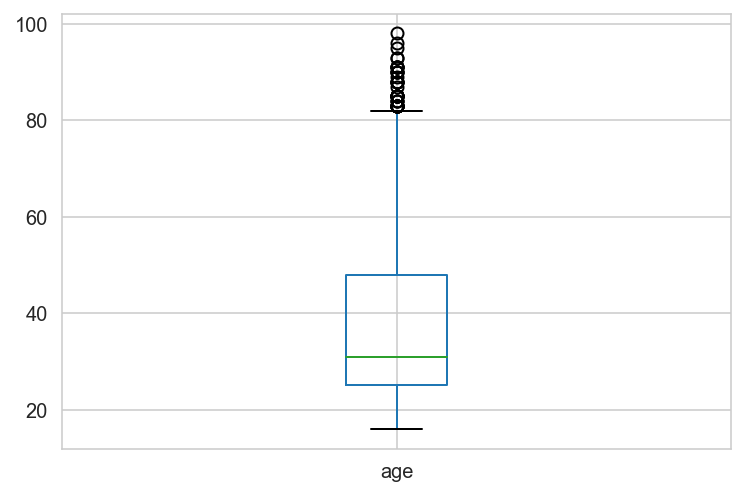

In [38]:
customers.boxplot(column='age')

Отчетливо видны выбросы после значения возраста 80. Посмотрим, сколько таких строк в датасете: 

In [39]:
customers.query('age > 80')

club_member fashion_news  age  customer_id
1350        active    Regularly   82        93274
3534        active            0   85        31463
3677        active            0   84       117047
8978        active            0   88       177025
10741       active            0   85       174829
...            ...          ...  ...          ...
223469      active            0   84        67294
226421      active    Regularly   91       212762
227716      active    Regularly   82       128322
228023      active    Regularly   82        77137
229748      active    Regularly   81       161925

[80 rows x 4 columns]

In [40]:
customers.drop(customers[customers.age > 80].index, inplace=True)
customers = customers.reset_index(drop=True)
customers.query('age > 80')

Empty DataFrame
Columns: [club_member, fashion_news, age, customer_id]
Index: []

## 4. Разведочный (исследовательский) анализ данных

In [41]:
#Создадим новый столбец с месяцами
transactions['month'] = transactions['t_dat'].dt.month

<AxesSubplot:ylabel='Density'>

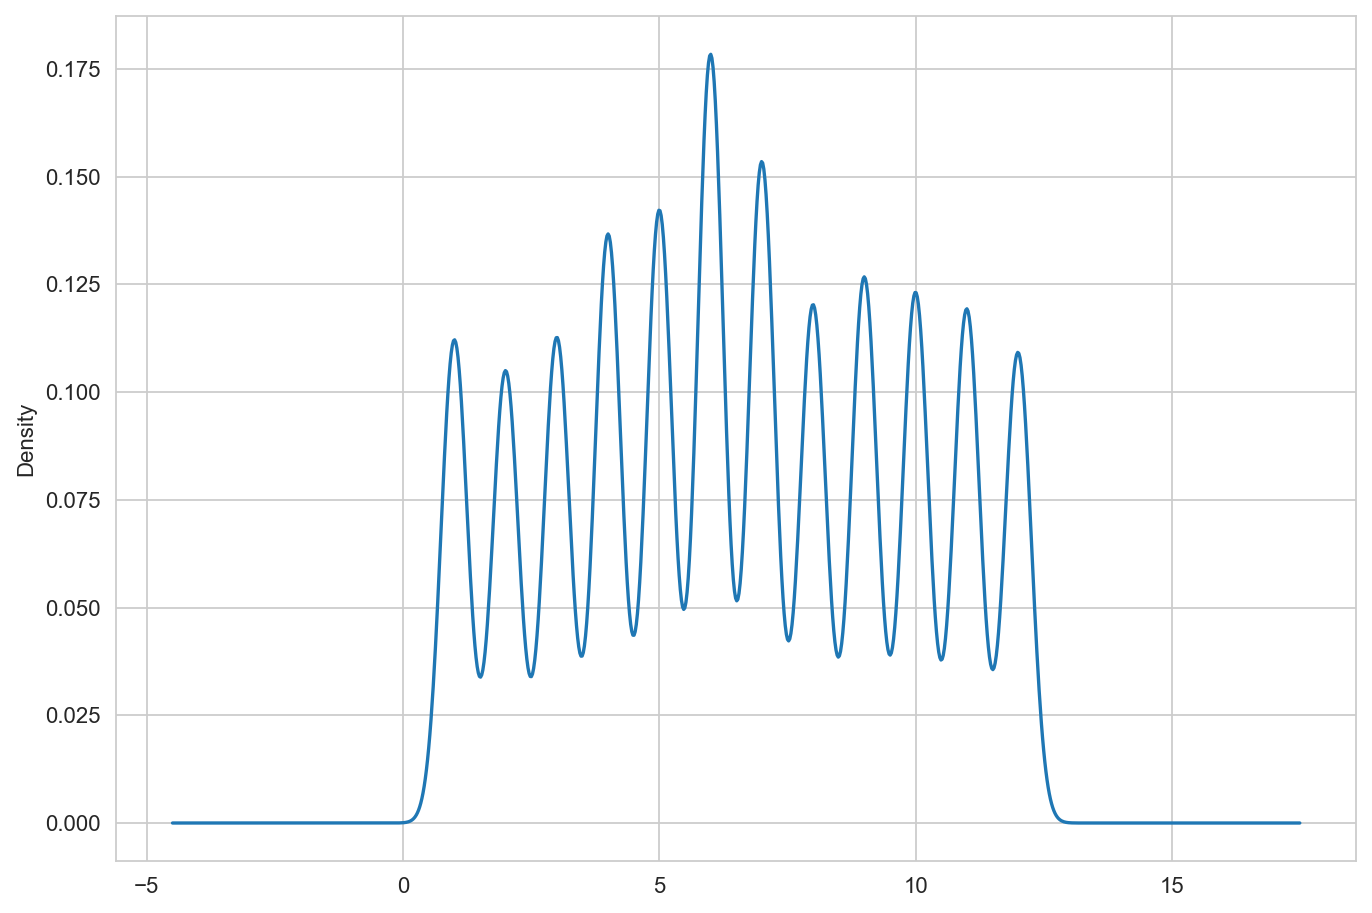

In [42]:
from matplotlib.pyplot import figure
figure(figsize=(10,7), dpi=80)
transactions['month'].plot(kind='density')


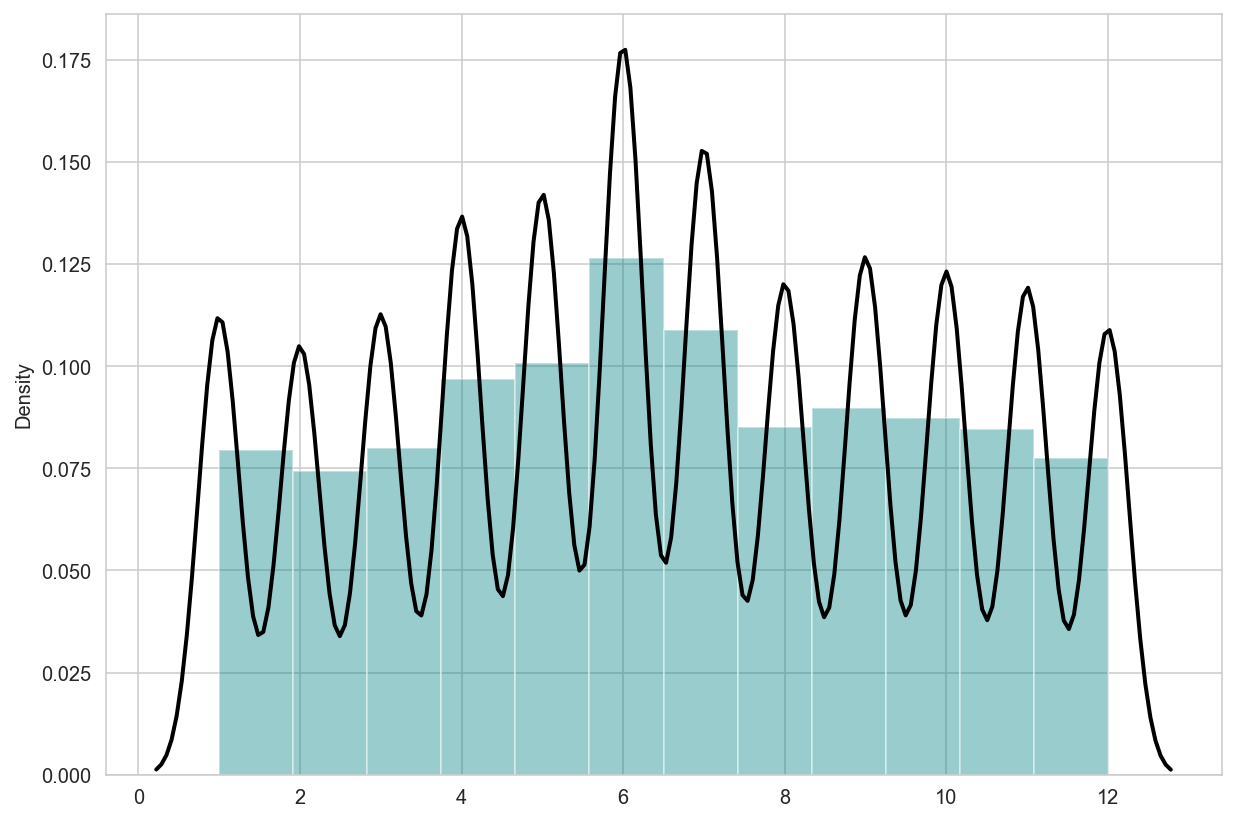

In [43]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.distplot(x=transactions['month'], color='teal', bins=12, kde=True, kde_kws=dict(linewidth=2,color='black'))
plt.show()

In [44]:
items_in_months = transactions.pivot_table(index='month', values='article_id', aggfunc='count')
items_in_months

article_id
month            
1           23159
2           21666
3           23263
4           28214
5           29357
6           36827
7           31681
8           24827
9           26158
10          25424
11          24629
12          22554

<AxesSubplot:xlabel='month'>

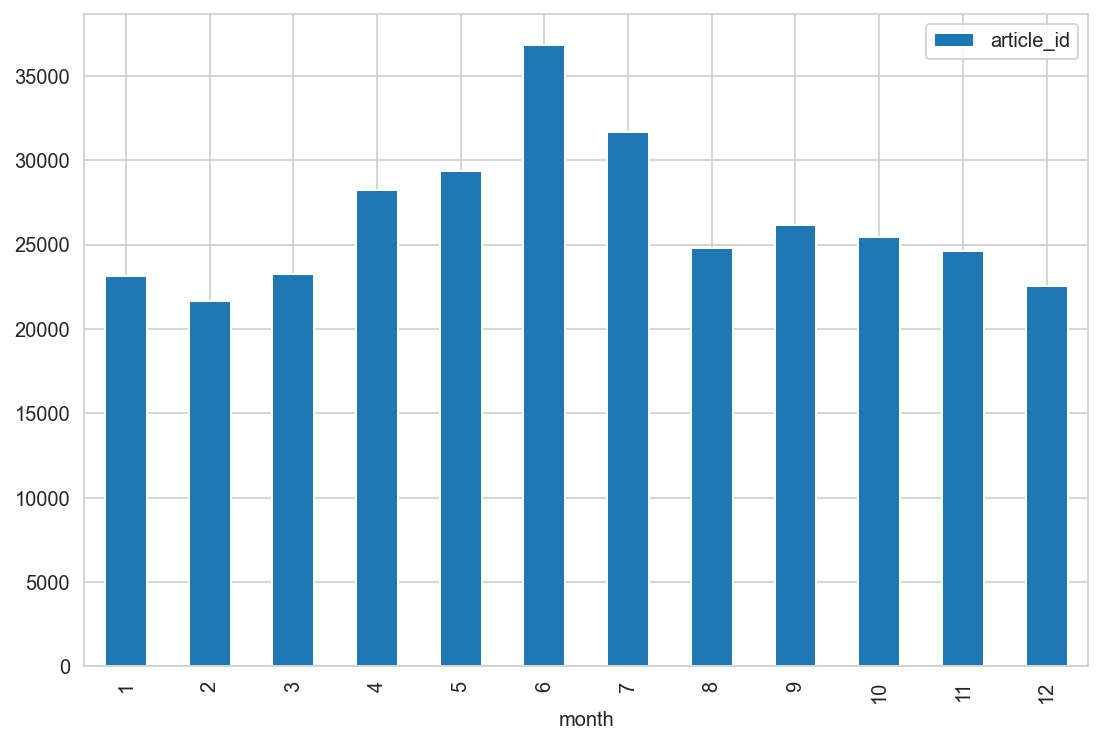

In [45]:
items_in_months.plot.bar(figsize=(9,6))

Отчетливо видим пик продаж в июне, на втором месте -- июль, а также заметно, что ближе к лету наблюдается небольшой рост продаж.

In [46]:
# Топ-10 товаров с максимальной выручкой
df_prices = transactions.pivot_table(index='article_id', values='price', aggfunc='sum').sort_values(by='price', ascending=False)
df_prices = df_prices.merge(product, left_on='article_id', right_on='article_id').sort_values(['price'],ascending=False)

In [47]:
df_prices.head(10)

article_id  price     product_name        color
0   706016001  16000         trousers        black
1   706016002  11055         trousers   light blue
2   568601006   9514           blazer        black
3   448509014   7646         trousers         blue
4   706016003   6837         trousers    dark blue
5   661794001   6822             coat  light beige
6   562245046   6743         trousers        black
7   399223001   6610         trousers        black
8   720125001   6173  leggings/tights        black
9   562245001   5622         trousers        black

In [48]:
df_prices1 = df_prices.pivot_table(index='product_name', values='price', aggfunc='sum').sort_values(by='price', ascending=False)
df_prices1.head(10)

price
product_name         
trousers      1481220
dress         1156100
sweater        795900
jacket         415509
blouse         406218
skirt          322078
top            309274
bra            308311
t-shirt        291679
shorts         266580

In [49]:
df_prices1 = df_prices1[:10]
df_prices1

price
product_name         
trousers      1481220
dress         1156100
sweater        795900
jacket         415509
blouse         406218
skirt          322078
top            309274
bra            308311
t-shirt        291679
shorts         266580

In [50]:
px.bar(df_prices1, x=df_prices1.index, y='price', title='top_10_items')

Топ-10 товаров с максимальной выручкой за все время: брюки, платья, свитера, пиджаки, блузки, юбки, топики, бюстгалтеры, футболки и шорты

In [51]:
#ТОП-10 самых популярных товаров, которые чаще всего покупались
sales = transactions.groupby(['article_id'])['article_id'].count().sort_values(ascending=False).to_frame(name='top_popular_items')
sales.reset_index()

top_popular_items1 = sales.merge(product, left_on='article_id', right_on='article_id') 
top_popular_items1 

pop_items = top_popular_items1.pivot_table(index='product_name', values='top_popular_items', aggfunc='sum')\
                    .sort_values(by='top_popular_items', ascending=False)
pop_items = pop_items[:10]
pop_items

top_popular_items
product_name                   
trousers                  42137
dress                     32115
sweater                   27961
t-shirt                   22084
top                       15779
blouse                    14847
vest top                  14017
bra                       13202
shorts                    11595
bikini top                11444

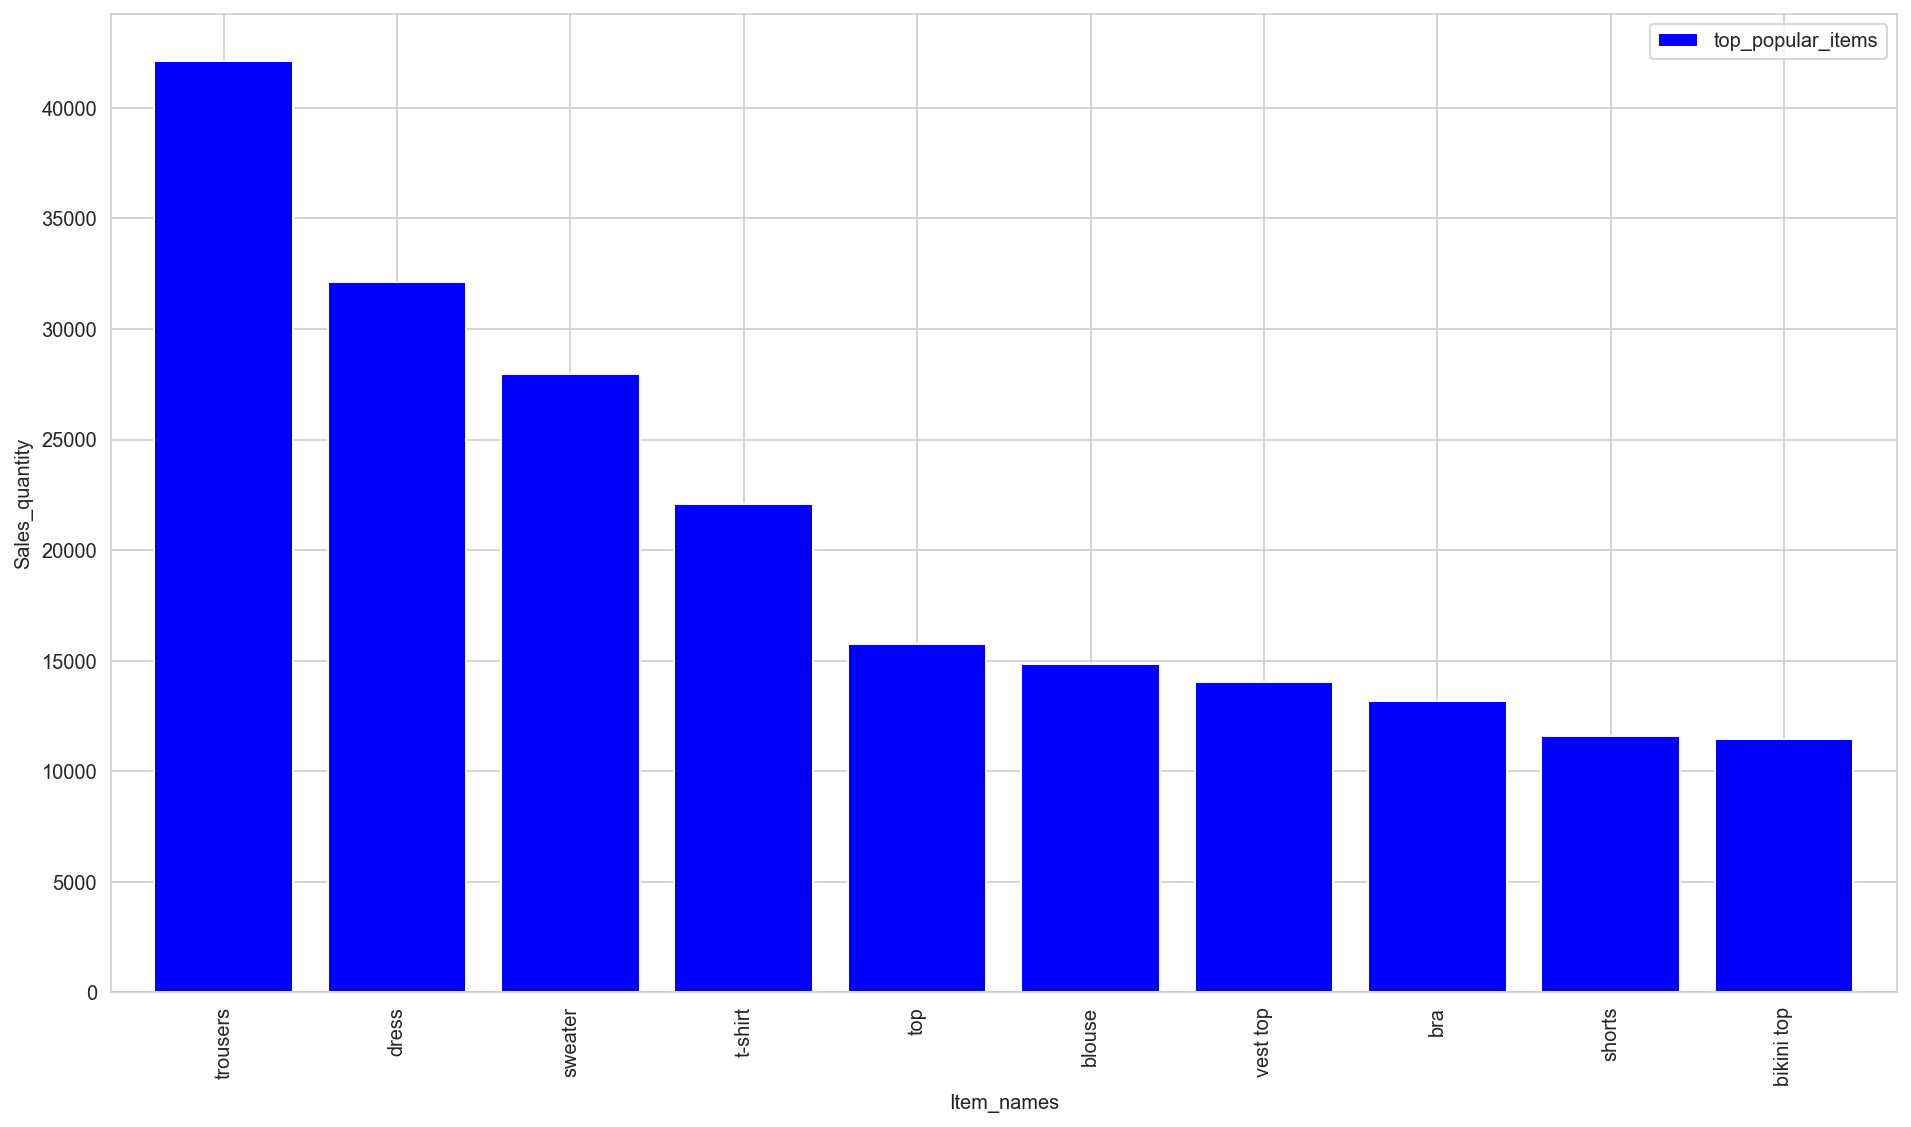

In [52]:
pop_items.plot(kind='bar', figsize=(16,9), width=0.8, color='blue')
plt.xlabel('Item_names') 
plt.ylabel('Sales_quantity')
plt.show()

In [53]:
once = (sales.top_popular_items == 1).sum()
multiple = (sales.top_popular_items > 1).sum()

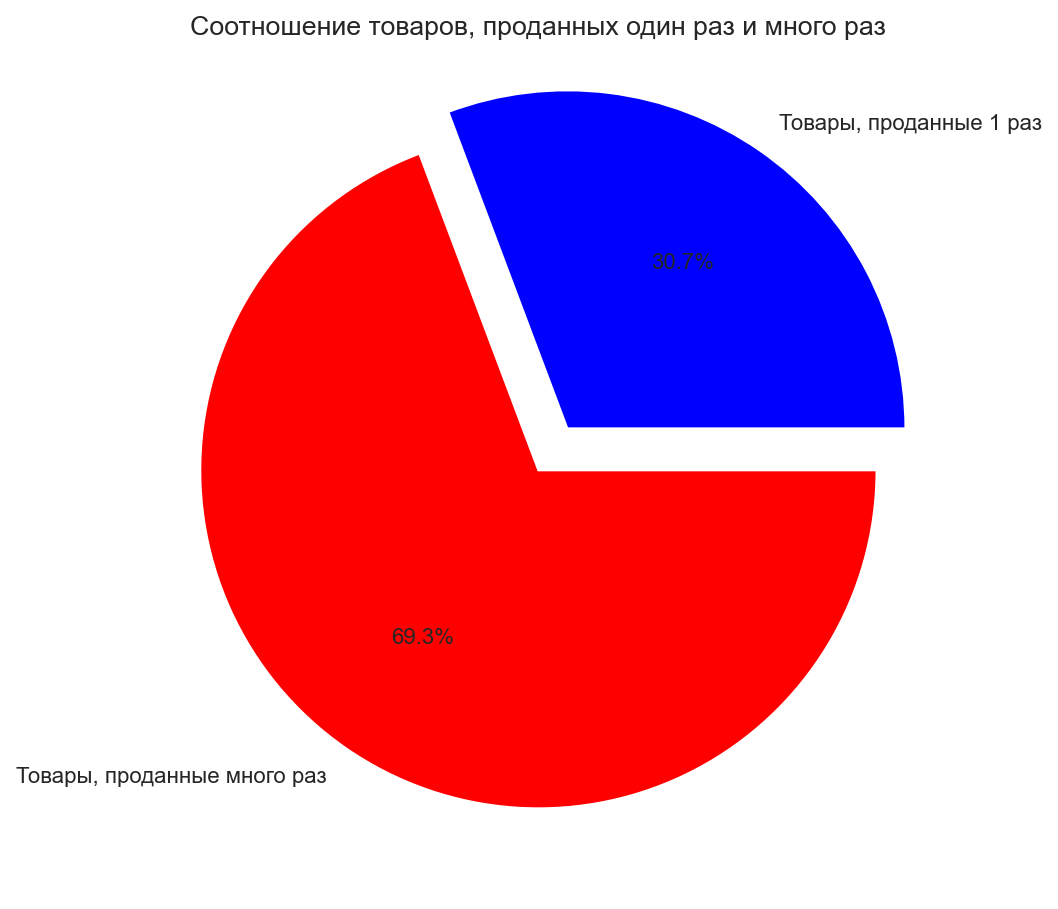

In [54]:
figure(figsize=(19,7), dpi=80)
plt.pie([once,multiple], labels = ['Товары, проданные 1 раз', 'Товары, проданные много раз'], colors = ['b','r'], autopct='%1.1f%%', explode = (0.15,0));
plt.title('Соотношение товаров, проданных один раз и много раз');

Определить какая возрастная группа покупает больше товаров, группы формировать с шагом 10 лет, построить столбчатую диаграмму и график плотности распределения

In [55]:
df_customers = transactions['customer_id'].value_counts().reset_index() \
            .rename(columns = {'customer_id':'sold_qty','index':'customer_id'})
df_customers = df_customers.merge(customers, how='left', left_on='customer_id', right_on='customer_id') \
            .sort_values(['sold_qty'],ascending=False)
df_customers

customer_id  sold_qty club_member fashion_news   age
0             23883        21      active    Regularly  61.0
2              2458        19      active            0  31.0
1              7232        19      active    Regularly  54.0
3              5919        17      active    Regularly  28.0
4             52416        16      active    Regularly  68.0
...             ...       ...         ...          ...   ...
115041       198585         1      active            0  23.0
115042       205594         1      active            0  18.0
115043       198587         1      active    Regularly  56.0
115044       198588         1      active            0  38.0
229743       229803         1      active            0  68.0

[229744 rows x 5 columns]

In [56]:
df_customers['age_groups'] = pd.cut(df_customers['age'], bins=[16, 20, 30, 40,50, 60, 70, float('Inf')], labels=['16-20', '20-30','30-40','40-50','50-60','60-70' , '70+'])
df_customers

customer_id  sold_qty club_member fashion_news   age age_groups
0             23883        21      active    Regularly  61.0      60-70
2              2458        19      active            0  31.0      30-40
1              7232        19      active    Regularly  54.0      50-60
3              5919        17      active    Regularly  28.0      20-30
4             52416        16      active    Regularly  68.0      60-70
...             ...       ...         ...          ...   ...        ...
115041       198585         1      active            0  23.0      20-30
115042       205594         1      active            0  18.0      16-20
115043       198587         1      active    Regularly  56.0      50-60
115044       198588         1      active            0  38.0      30-40
229743       229803         1      active            0  68.0      60-70

[229744 rows x 6 columns]

In [57]:
df_customers1 = df_customers.pivot_table(index='age_groups', values='sold_qty', aggfunc='sum')\
                        .sort_values(by='sold_qty', ascending=False)

df_customers1

sold_qty
age_groups          
20-30         135651
30-40          56553
40-50          52262
50-60          46763
16-20          14604
60-70          10098
70+             1699

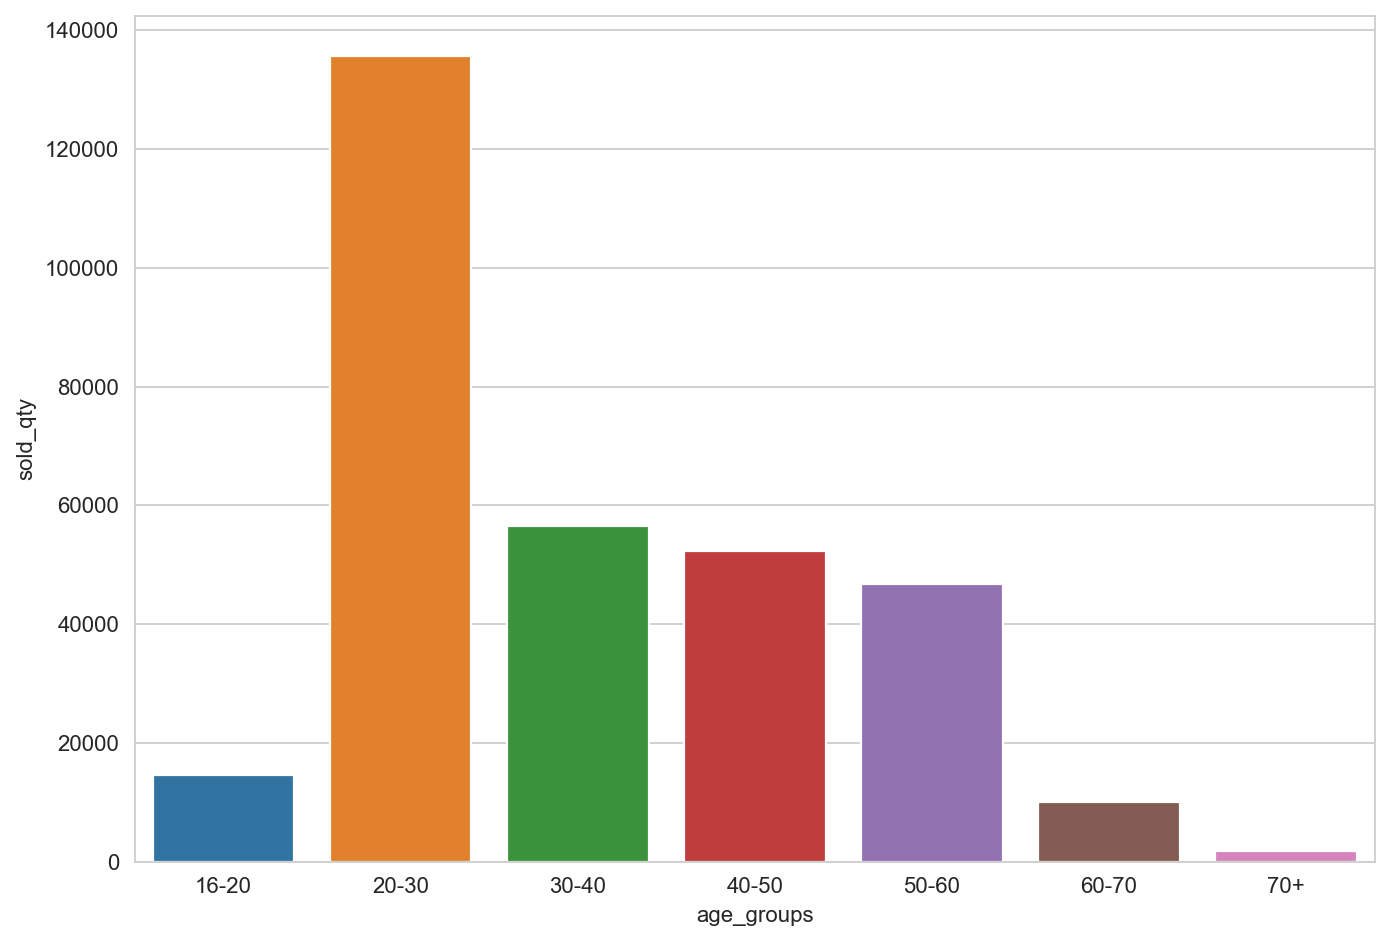

In [58]:
figure(figsize=(10,7), dpi=80)
sns.barplot(data=df_customers1, x=df_customers1.index, y='sold_qty'); 

<AxesSubplot:ylabel='Density'>

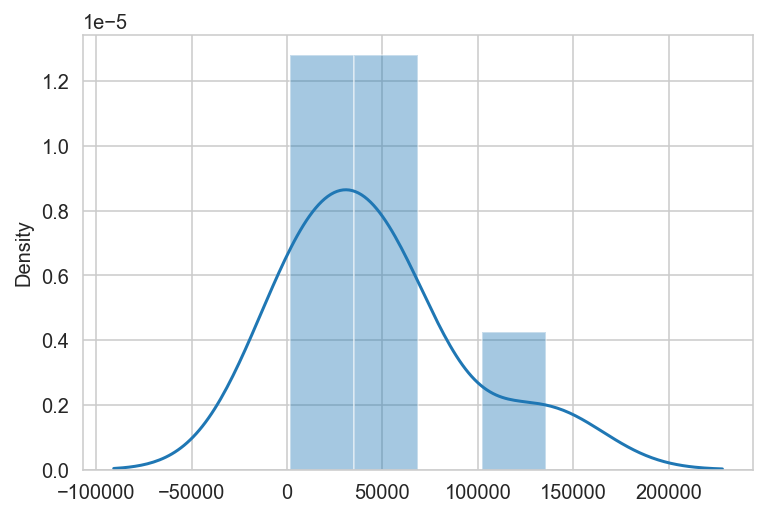

In [59]:
sns.distplot(df_customers1)

<AxesSubplot:ylabel='Density'>

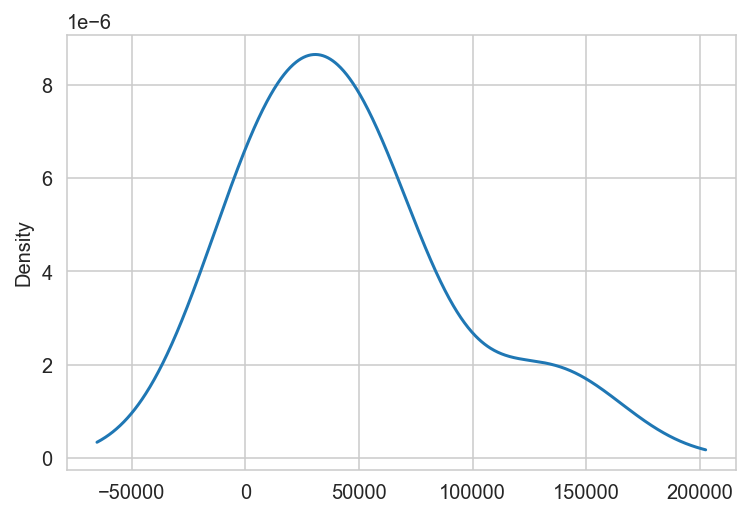

In [60]:
df_customers1['sold_qty'].plot(kind='density')

Больше всего товаров покупают люди 20-30 лет.

Определить покупают ли больше товаров те, кто активно следит за новостями о моде, построить стобчатую диаграмму

In [61]:
df_customers2 = df_customers.pivot_table(index='fashion_news', values='sold_qty', aggfunc='sum')
df_customers2

sold_qty
fashion_news          
0               182251
Monthly            100
Regularly       135295

<AxesSubplot:xlabel='fashion_news', ylabel='sold_qty'>

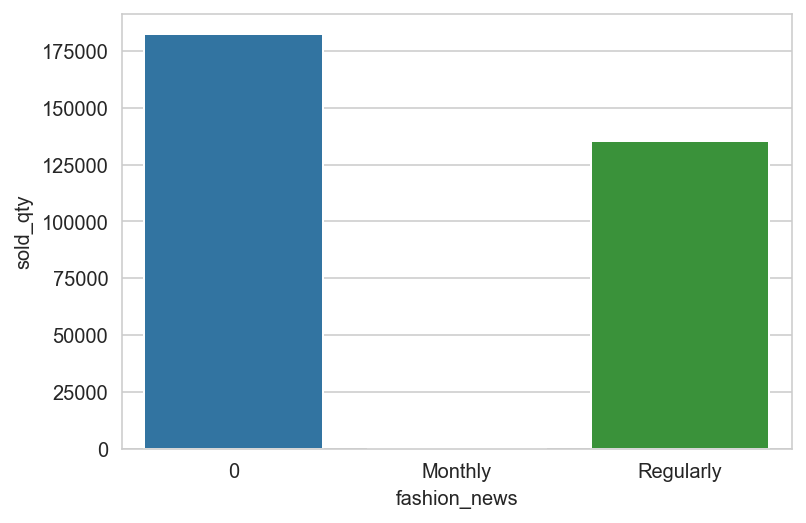

In [62]:
sns.barplot(data=df_customers2, x=df_customers2.index, y='sold_qty', ci=None)

Мониторинг новостей моды несильно влияет на продажи. Больше всего товаров все равно купили те, кто не смотрит новости о моде совсем.

## 5. Анализ взаимосвязи признаков

Проверить гипотезу о данных - влияет ли статус членства клуба на количество купленных товаров, найти p-value, сформулировать вывод

In [63]:
import scipy.stats as st
from statsmodels.api import stats

In [64]:
df_customers

customer_id  sold_qty club_member fashion_news   age age_groups
0             23883        21      active    Regularly  61.0      60-70
2              2458        19      active            0  31.0      30-40
1              7232        19      active    Regularly  54.0      50-60
3              5919        17      active    Regularly  28.0      20-30
4             52416        16      active    Regularly  68.0      60-70
...             ...       ...         ...          ...   ...        ...
115041       198585         1      active            0  23.0      20-30
115042       205594         1      active            0  18.0      16-20
115043       198587         1      active    Regularly  56.0      50-60
115044       198588         1      active            0  38.0      30-40
229743       229803         1      active            0  68.0      60-70

[229744 rows x 6 columns]

заменим в столбце ['club_member'] строковые значения числовыми, где 0 = покинул клуб, 1 = только собирается стать членом клуба, 2 = активный член клуба, изменим тип данных на числовой, проверим на пустые строки, так как при сведении таблиц они могли появиться, ну и применим статистический метод хи кв. для числового и категориального признака. Выведем p-value.

H0: количество купленных товаров не зависит от статуса членства клуба; 
H1: количество купленных товаров зависит от статуса членства клуба.

In [65]:
df_customers['club_member'] = df_customers['club_member'].str.replace('pre-create', '1')
df_customers['club_member'] = df_customers['club_member'].str.replace('active', '2')
df_customers['club_member'] = df_customers['club_member'].str.replace('left club', '0')
df_customers['club_member'].value_counts()
df_customers['club_member'].isna().sum()
df_customers.dropna(subset='club_member', inplace=True)
df_customers['club_member'] = df_customers['club_member'].astype('int')

In [66]:
from scipy.stats import chi2_contingency
table = pd.crosstab(df_customers.club_member,
df_customers.sold_qty)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Хи-квадрат %0.2f p-значение %0.3f' % (chi2, p))

Хи-квадрат 883.36 p-значение 0.000


In [67]:
from scipy.stats import pointbiserialr
pointbiserialr(df_customers['club_member'],df_customers['sold_qty'])

PointbiserialrResult(correlation=0.05367642337177139, pvalue=3.970525069406476e-146)

Вывод: P-value показал, связь статистически подтверждается. Соответственно, нулевая гипотеза отвергнута. Признаки зависимы.

## Шаг 6. Кластеризация по покупателем

Сформировать датасет с признаками покупатель, количество купленных товаров, возраст, итоговая потраченная сумма, членство в клубе, частота просмотра новостей\
Найти оптимальное количество кластеров по покупателям\
Построить модель кластеризации данных\
Визуализировать кластеры с помощью диаграммы рассеивания, выбрать подходящие признаки для диаграммы

In [68]:
df_price = transactions[['price','customer_id']].groupby('customer_id').sum().sort_values(by='price', ascending=False) \
            .rename(columns = {'price': 'выручка'}).reset_index()

df_customers_quantity = df_customers.merge(df_price, how='left', left_on='customer_id', right_on='customer_id')\
            .sort_values(['sold_qty'], ascending=False)
df_customers_quantity['fashion_news'] = df_customers_quantity['fashion_news'].replace({'Regularly': 2, 'Monthly': 1})
del df_customers_quantity['age_groups']
df_customers_quantity.head(10)

customer_id  sold_qty  club_member fashion_news   age  выручка
0        23883        21            2            2  61.0      921
2         7232        19            2            2  54.0      598
1         2458        19            2            0  31.0      651
3         5919        17            2            2  28.0      758
4        52416        16            2            2  68.0      554
5        18097        16            2            0  43.0      511
6        34469        16            2            0  46.0      420
7        40359        15            2            2  60.0      514
8        10970        15            2            2  32.0      618
9        23857        14            2            0  28.0      430

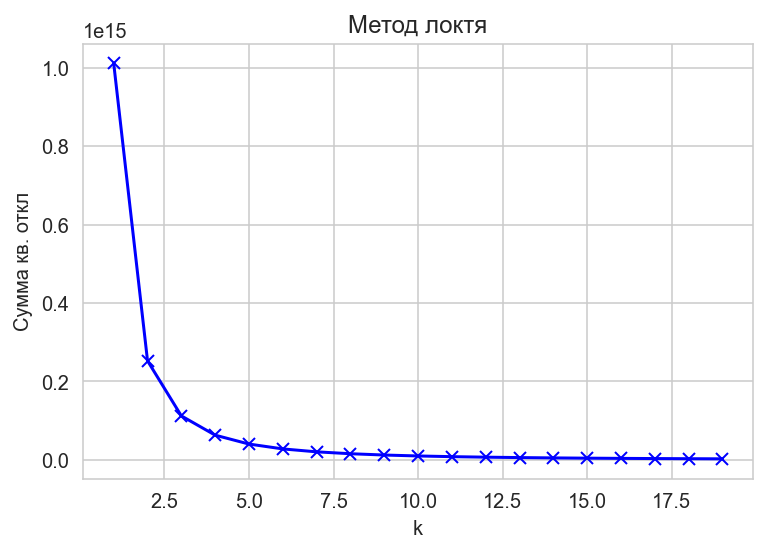

In [69]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df_customers_quantity[["customer_id", "sold_qty"]])
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Сумма кв. откл')
plt.title('Метод локтя')
plt.show()

In [70]:
kmeans = KMeans(n_clusters = 4, random_state=0).fit(df_customers_quantity[['sold_qty', 'club_member', 'fashion_news', 'age', 'выручка']])
predict = kmeans.predict(df_customers_quantity[['sold_qty', 'club_member', 'fashion_news', 'age', 'выручка']])
df_customers_quantity['Кластер'] = predict
df_customers_quantity.head()

customer_id  sold_qty  club_member fashion_news   age  выручка  Кластер
0        23883        21            2            2  61.0      921        2
2         7232        19            2            2  54.0      598        2
1         2458        19            2            0  31.0      651        2
3         5919        17            2            2  28.0      758        2
4        52416        16            2            2  68.0      554        2

Text(0.5, 1.0, '4 кластера K-Means')

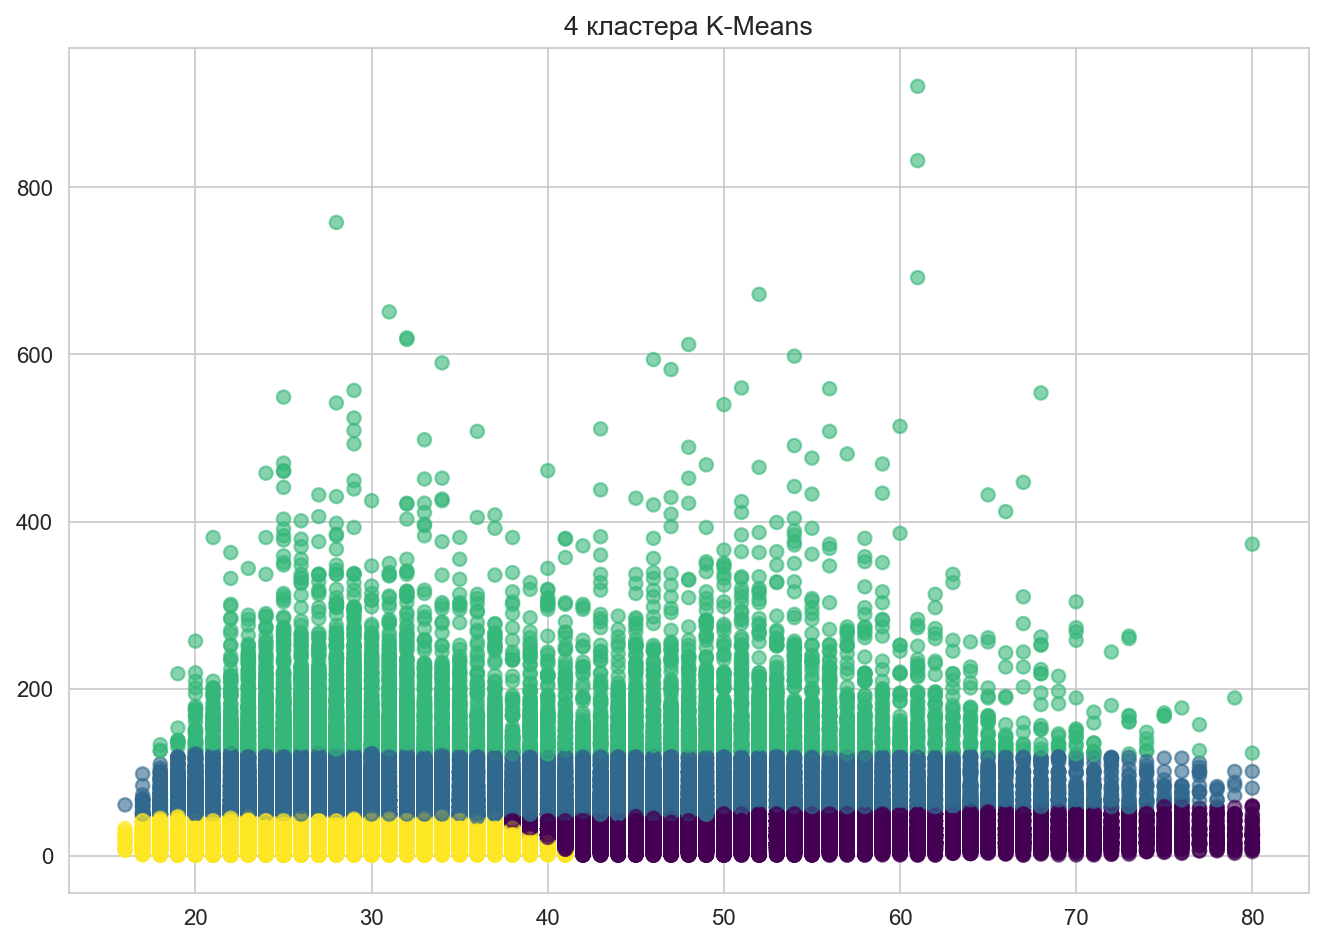

In [71]:
figure(figsize=(10,7), dpi=80)
plt.scatter(df_customers_quantity['age'], df_customers_quantity["выручка"], c = kmeans.labels_, cmap='viridis', alpha = 0.6)
plt.title('4 кластера K-Means')

## Шаг 7. Построение рекомендательной системы

Сформировать датасет с признаками покупатель, товар, количество купленных товаров\
Выполнить коллаборативную фильтрацию по схожести покупателей\
Вывести в качестве рекомендаций список наименований товаров для пользователя с ИД = 6510

In [72]:
transactions1 = transactions.groupby(['customer_id','article_id'])['article_id'].count().to_frame(name='bought_items').reset_index()
transactions1

customer_id  article_id  bought_items
0                 0   706016003             1
1                 0   812376001             1
2                 1   493810014             1
3                 2   594541012             1
4                 3   719712001             1
...             ...         ...           ...
317012       229799   636323001             1
317013       229800   657795001             1
317014       229801   636323001             1
317015       229802   589924010             1
317016       229803   720506003             1

[317017 rows x 3 columns]

In [73]:
transactions1.columns = ['user','item','rating']
transactions1 = transactions1.iloc[:15000,:] 

In [74]:
from sklearn.neighbors import NearestNeighbors  
from collections import defaultdict
from scipy.sparse import csr_matrix 

df_matrix = transactions1.pivot(index= 'user',columns='item',values='rating').fillna(0)
w1_pivot_matrix = csr_matrix(df_matrix)


knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(w1_pivot_matrix)

def most_similar_users_to(user_id):
    most_similar_users_to = []
    distance, indice = model_knn.kneighbors(df_matrix.iloc[user_id,:].values.reshape(1,-1), n_neighbors=10)
    for i in range(1, len(distance.flatten())):
        user_id1 = df_matrix.index[indice.flatten()[i]]
        most_similar_users_to.append((user_id1, distance.flatten()[i]))

    most_similar_users_to.sort(key=lambda x: x[1], reverse=True)

    return most_similar_users_to[:10] 
    
    
def user_based_suggestions(user_id):
    # суммировать все коэффициенты подобия
    suggestions = defaultdict(float)
    non_interacted_items = df_matrix.iloc[user_id][df_matrix.iloc[user_id]==0].index.tolist()
    for other_user_id, similarity in most_similar_users_to(user_id):
        items_user_id = df_matrix.loc[other_user_id][df_matrix.loc[other_user_id]>0]
        for interest in items_user_id.index.tolist():
            if interest in non_interacted_items:
                 # для вывода списка товаров/фильмов,  df_items - датафрейм с названиями товаров/фильмов
                item_name = product[product['article_id']==interest]['product_name'].values[0]
                suggestions[item_name] += similarity
    # преобразовать их в сортированный список
    suggestions = sorted(suggestions.items(),
                         key=lambda x: x[1],
                         reverse=True)
    return suggestions[:10]    
    

print("Рекомендации для пользователя")
print(user_based_suggestions(6510))

Рекомендации для пользователя
[('trousers', 4.0), ('jacket', 1.0), ('leggings/tights', 1.0), ('vest top', 1.0), ('bra', 1.0), ('sweater', 1.0), ('bag', 1.0), ('dress', 1.0), ('jumpsuit/playsuit', 1.0), ('blouse', 1.0)]
